In [1]:
import numpy as np                   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import rasterio
import re
import netCDF4 as nc

sns.set_style("darkgrid")
sns.set_context("paper")
%matplotlib inline
plt.rcParams["font.sans-serif"]='SimHei'   
plt.rcParams['axes.unicode_minus']=False   
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',8)             
pd.set_option('display.max_rows',15)

### 高程数据

In [2]:
with rasterio.open(r'F:\研究生学习\华为杯\第二问最终代码\python\chdem_105.tif') as df1:
    value1 = df1.read(1) 
    value1 = value1.astype(np.float32)
    value1[value1<-500] = np.nan      
    bounds1 = df1.bounds
    left1,bottom1,right1,top1 = bounds1
    transform1 = df1.transform
    xvalue1 = df1.width
    yvalue1 = df1.height
    xaltitude1 = np.linspace(left1,right1,xvalue1)
    yaltitude1 = np.linspace(bottom1,top1,yvalue1)
    Xaltitude1, Yaltitude1 = np.meshgrid(xaltitude1, yaltitude1)  
df1_output = pd.DataFrame(value1)
df1_output

0     1     2     3     ...  7058  7059  7060  7061
0      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
1      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
2      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
3      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
4      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
...    ...   ...   ...   ...  ...   ...   ...   ...   ...
5014   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5015   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5016   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5017   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5018   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN

[5019 rows x 7062 columns]

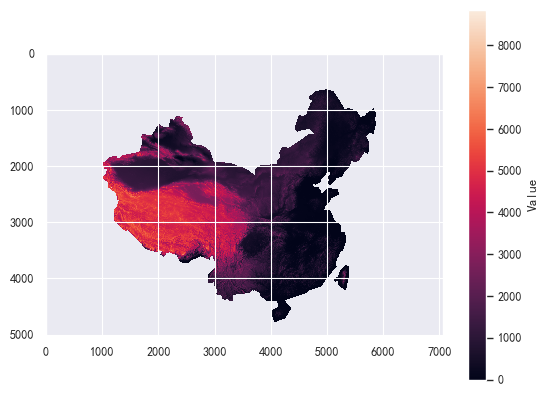

In [3]:
plt.imshow(df1_output)
plt.colorbar(label='Value')
plt.savefig('F:\研究生学习\华为杯\第二问图片\高程2.png',
            dpi=400,
            bbox_inches = 'tight',
            facecolor = 'w',
            edgecolor = 'b')

### 坡向数据

In [4]:
with rasterio.open(r'F:\研究生学习\华为杯\第二问最终代码\python\chdem_Aspect.tif') as df2:
    value2 = df2.read(1)  
    value2[value2<-500] = np.nan      
    bounds2 = df2.bounds
    left2,bottom2,right2,top2 = bounds2
    transform2 = df2.transform
    xvalue2 = df2.width
    yvalue2 = df2.height 
    xaltitude2 = np.linspace(left2,right2,xvalue2)
    yaltitude2 = np.linspace(bottom2,top2,yvalue2)
    Xaltitude2, Yaltitude2 = np.meshgrid(xaltitude2, yaltitude2)
df2_output = pd.DataFrame(value2)
df2_output

0     1     2     3     ...  7058  7059  7060  7061
0      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
1      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
2      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
3      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
4      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
...    ...   ...   ...   ...  ...   ...   ...   ...   ...
5014   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5015   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5016   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5017   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5018   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN

[5019 rows x 7062 columns]

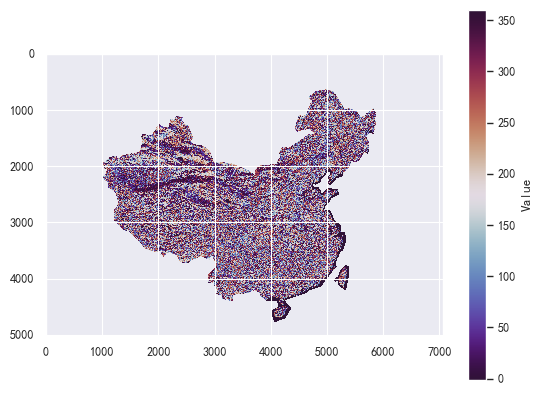

In [10]:
plt.imshow(df2_output,cmap='twilight_shifted')
plt.colorbar(label='Value')
plt.savefig('F:\研究生学习\华为杯\第二问图片\坡向.png',
            dpi=400,
            bbox_inches = 'tight',
            facecolor = 'w',
            edgecolor = 'b')

### 坡度数据

In [6]:
with rasterio.open(r'F:\研究生学习\华为杯\第二问最终代码\python\chdem_Slope.tif') as df3:
    value3 = df3.read(1)  
    value3[value3<-5000] = np.nan      
    bounds3 = df3.bounds
    left3,bottom3,right3,top3 = bounds3
    transform3 = df3.transform
    xvalue3 = df3.width
    yvalue3 = df3.height
    xaltitude3 = np.linspace(left3,right3,xvalue3)
    yaltitude3 = np.linspace(bottom3,top3,yvalue3)
    Xaltitude3, Yaltitude3 = np.meshgrid(xaltitude3, yaltitude3)
df3_output = pd.DataFrame(value3)
df3_output

0     1     2     3     ...  7058  7059  7060  7061
0      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
1      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
2      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
3      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
4      NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
...    ...   ...   ...   ...  ...   ...   ...   ...   ...
5014   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5015   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5016   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5017   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN
5018   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN

[5019 rows x 7062 columns]

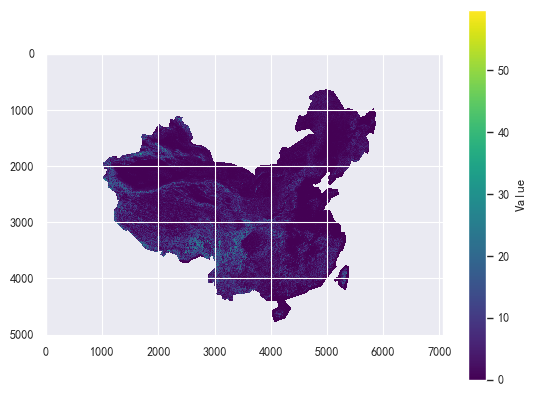

In [11]:
plt.imshow(df3_output,cmap='viridis')
plt.colorbar(label='Value')
plt.savefig('F:\研究生学习\华为杯\第二问图片\坡度.png',
            dpi=400,
            bbox_inches = 'tight',
            facecolor = 'w',
            edgecolor = 'b')

### 土地利用数据

In [8]:
import os
import rasterio
import re
import pandas as pd
import numpy as np

def read_tif(file_path):  
    with rasterio.open(file_path) as src:
        band_data = src.read(1).astype(np.float32) 
        return band_data, src.bounds, src.transform, src.width, src.height

def extract_year_from_filename(file_name):
    match = re.search(r'(\d{4})', file_name)
    if match:
        return int(match.group(1))
    raise ValueError(f"Could not extract year from file name: {file_name}")

def process_folder(folder_path):
    data_dict = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):
            year = extract_year_from_filename(file_name)
            if 1961 <= year <= 2018:
                tif_path = os.path.join(folder_path, file_name)
                value, bounds, transform, xvalue, yvalue = read_tif(tif_path)
                left, bottom, right, top = bounds
                xaltitude = np.linspace(left, right, xvalue)
                yaltitude = np.linspace(bottom, top, yvalue)
                df_output = pd.DataFrame(value)
                data_dict[year] = df_output
    return data_dict

def save_to_excel(data_dict, output_path):
    with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
        for year, df in data_dict.items():
            df.to_excel(writer, sheet_name=str(year), index=False)

folder_path = 'F:\研究生学习\华为杯\第二问图片\\' 
all_year_data = process_folder(folder_path)
output_excel_path = 'F:\研究生学习\华为杯\第二问图片\crop_data_1961_2018.xlsx'
save_to_excel(all_year_data, output_excel_path)
output_excel_path

'F:\\研究生学习\\华为杯\\第二问图片\\crop_data_1961_2018.xlsx'

In [9]:
folder_path = 'C:/Users/c/Desktop/第二问最终代码/python/forest/' 
all_year_data = process_folder(folder_path)
output_excel_path = 'C:/Users/c/Desktop/第二问最终代码/python/forest_data_1961_2018.xlsx'
save_to_excel(all_year_data, output_excel_path)
folder_path = 'C:/Users/c/Desktop/第二问最终代码/python/grass/' 
all_year_data = process_folder(folder_path)
output_excel_path = 'C:/Users/c/Desktop/第二问最终代码/python/grass_data_1961_2018.xlsx'
save_to_excel(all_year_data, output_excel_path)
folder_path = 'C:/Users/c/Desktop/第二问最终代码/python/shrub/' 
all_year_data = process_folder(folder_path)
output_excel_path = 'C:/Users/c/Desktop/第二问最终代码/python/shrub_data_1961_2018.xlsx'
save_to_excel(all_year_data, output_excel_path)
folder_path = 'C:/Users/c/Desktop/第二问最终代码/python/wet/' 
all_year_data = process_folder(folder_path)
output_excel_path = 'C:/Users/c/Desktop/第二问最终代码/python/wet_data_1961_2018.xlsx'
save_to_excel(all_year_data, output_excel_path)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'C:/Users/c/Desktop/第二问最终代码/python/forest/'

## 关系求解

### 高程和土地类型

In [ ]:
def crop_to_divisible(matrix, target_shape):
    new_height = (matrix.shape[0] // target_shape[0]) * target_shape[0]
    new_width = (matrix.shape[1] // target_shape[1]) * target_shape[1]
    return matrix[:new_height, :new_width]

def downsample_matrix(matrix, target_shape):
    matrix_cropped = crop_to_divisible(matrix, target_shape)
    factor_x = matrix_cropped.shape[0] // target_shape[0]
    factor_y = matrix_cropped.shape[1] // target_shape[1]
    downsampled = matrix_cropped.reshape(target_shape[0], factor_x, target_shape[1], factor_y).mean(axis=(1, 3))
    return downsampled

df1_output=df1_output.fillna(0) 
large_matrix = df1_output.values  
excel_file_path = 'crop_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results1 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[sheet_name] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Sheet Name', 'crop-高程'])
correlation_df1

In [ ]:
df1_output=df1_output.fillna(0) 
large_matrix = df1_output.values  

excel_file_path = 'forest_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[sheet_name] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()),columns=['Sheet Name', 'forest-高程'])

excel_file_path = 'grass_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results3 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[sheet_name] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()),columns=['Sheet Name', 'grass-高程'])

excel_file_path = 'shrub_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results4 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results4[sheet_name] = correlation
correlation_df4 = pd.DataFrame(list(correlation_results4.items()),columns=['Sheet Name', 'shrub-高程'])

excel_file_path = 'wet_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results5 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results5[sheet_name] = correlation
correlation_df5 = pd.DataFrame(list(correlation_results5.items()),columns=['Sheet Name', 'wet-高程'])

In [ ]:
co1 = correlation_df1
co1['forest-高程']=correlation_df2['forest-高程']
co1['grass-高程']=correlation_df3['grass-高程']
co1['shrub-高程']=correlation_df4['shrub-高程']
co1['wet-高程']=correlation_df5['wet-高程']
co1

In [ ]:
co1.to_excel("C:/Users/c/Desktop/高程和土地类型.xlsx")

### 坡向和土地类型

In [ ]:
df2_output=df2_output.fillna(0) 
large_matrix = df2_output.values  

excel_file_path = 'crop_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results1 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[sheet_name] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Sheet Name', 'crop-坡向'])

excel_file_path = 'forest_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[sheet_name] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()),columns=['Sheet Name', 'forest-坡向'])

excel_file_path = 'grass_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results3 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[sheet_name] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()),columns=['Sheet Name', 'grass-坡向'])

excel_file_path = 'shrub_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results4 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results4[sheet_name] = correlation
correlation_df4 = pd.DataFrame(list(correlation_results4.items()),columns=['Sheet Name', 'shrub-坡向'])

excel_file_path = 'wet_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results5 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results5[sheet_name] = correlation
correlation_df5 = pd.DataFrame(list(correlation_results5.items()),columns=['Sheet Name', 'wet-坡向'])

In [ ]:
co2 = correlation_df1
co2['forest-坡向']=correlation_df2['forest-坡向']
co2['grass-坡向']=correlation_df3['grass-坡向']
co2['shrub-坡向']=correlation_df4['shrub-坡向']
co2['wet-坡向']=correlation_df5['wet-坡向']
co2

In [ ]:
co2.to_excel("C:/Users/c/Desktop/坡向和土地类型.xlsx")

### 坡度和土地类型

In [ ]:
df3_output=df3_output.fillna(0) 
large_matrix = df3_output.values  

excel_file_path = 'crop_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results1 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[sheet_name] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Sheet Name', 'crop-坡度'])

excel_file_path = 'forest_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[sheet_name] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()),columns=['Sheet Name', 'forest-坡度'])

excel_file_path = 'grass_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results3 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[sheet_name] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()),columns=['Sheet Name', 'grass-坡度'])

excel_file_path = 'shrub_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results4 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results4[sheet_name] = correlation
correlation_df4 = pd.DataFrame(list(correlation_results4.items()),columns=['Sheet Name', 'shrub-坡度'])

excel_file_path = 'wet_data_1961_2018.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results5 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results5[sheet_name] = correlation
correlation_df5 = pd.DataFrame(list(correlation_results5.items()),columns=['Sheet Name', 'wet-坡度'])

In [ ]:
co3 = correlation_df1
co3['forest-坡度']=correlation_df2['forest-坡度']
co3['grass-坡度']=correlation_df3['grass-坡度']
co3['shrub-坡度']=correlation_df4['shrub-坡度']
co3['wet-坡度']=correlation_df5['wet-坡度']
co3

In [ ]:
co3.to_excel("C:/Users/c/Desktop/坡度和土地类型.xlsx")

### 降雨量和高程，坡向，坡度

In [ ]:
df1_output=df1_output.fillna(0) 
large_matrix = df1_output.values  

excel_file_path = '降雨量.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results1 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[sheet_name] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Sheet Name', '降雨量-高程'])

df2_output=df2_output.fillna(0) 
large_matrix = df2_output.values  

excel_file_path = '降雨量.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[sheet_name] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()), columns=['Sheet Name', '降雨量-坡向'])

df3_output=df3_output.fillna(0) 
large_matrix = df3_output.values  

excel_file_path = '降雨量.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[sheet_name] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()), columns=['Sheet Name', '降雨量-坡度'])

rains=correlation_df1
rains['降雨量-坡向']=correlation_df2['降雨量-坡向']
rains['降雨量-坡度']=correlation_df3['降雨量-坡度']

In [ ]:
rains

In [ ]:
rains.to_excel("C:/Users/c/Desktop/降雨量和地形.xlsx")

### 降雨量和土地类型

In [ ]:
def crop_to_divisible(matrix, target_shape):
    new_height = (matrix.shape[0] // target_shape[0]) * target_shape[0]
    new_width = (matrix.shape[1] // target_shape[1]) * target_shape[1]
    new_height = min(new_height, matrix.shape[0])
    new_width = min(new_width, matrix.shape[1])
    
    return matrix[:new_height, :new_width]

def downsample_matrix(matrix, target_shape):
    matrix_cropped = crop_to_divisible(matrix, target_shape)
    
    factor_x = matrix_cropped.shape[0] // target_shape[0]
    factor_y = matrix_cropped.shape[1] // target_shape[1]
    downsampled = matrix_cropped.reshape(target_shape[0], factor_x, target_shape[1], factor_y).mean(axis=(1, 3))
    return downsampled


large_matrix_excel_path = '降雨量.xlsx'  
small_matrix_excel_path = 'crop_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)

correlation_results1 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[year] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Year', '降雨量-crop'])

large_matrix_excel_path = '降雨量.xlsx'  
small_matrix_excel_path = 'forest_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results2 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[year] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()), columns=['Year', '降雨量-forest'])

large_matrix_excel_path = '降雨量.xlsx'  
small_matrix_excel_path = 'grass_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results3 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[year] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()), columns=['Year', '降雨量-grass'])

large_matrix_excel_path = '降雨量.xlsx'  
small_matrix_excel_path = 'shrub_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results4 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results4[year] = correlation
correlation_df4 = pd.DataFrame(list(correlation_results4.items()), columns=['Year', '降雨量-shrub'])

large_matrix_excel_path = '降雨量.xlsx'  
small_matrix_excel_path = 'wet_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results5 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results5[year] = correlation
correlation_df5 = pd.DataFrame(list(correlation_results5.items()), columns=['Year', '降雨量-wet'])

In [ ]:
rainsland=correlation_df1
rainsland['降雨量-forest']=correlation_df2['降雨量-forest']
rainsland['降雨量-grass']=correlation_df3['降雨量-grass']
rainsland['降雨量-shrub']=correlation_df4['降雨量-shrub']
rainsland['降雨量-wet']=correlation_df5['降雨量-wet']
rainsland

In [ ]:
rainsland.to_excel("C:/Users/c/Desktop/降雨量和土地类型.xlsx")

### 暴雨次数和土地类型

In [ ]:
def crop_to_divisible(matrix, target_shape):
    new_height = (matrix.shape[0] // target_shape[0]) * target_shape[0]
    new_width = (matrix.shape[1] // target_shape[1]) * target_shape[1]
    new_height = min(new_height, matrix.shape[0])
    new_width = min(new_width, matrix.shape[1])
    
    return matrix[:new_height, :new_width]

def downsample_matrix(matrix, target_shape):
    matrix_cropped = crop_to_divisible(matrix, target_shape)
    
    factor_x = matrix_cropped.shape[0] // target_shape[0]
    factor_y = matrix_cropped.shape[1] // target_shape[1]
    downsampled = matrix_cropped.reshape(target_shape[0], factor_x, target_shape[1], factor_y).mean(axis=(1, 3))
    return downsampled


large_matrix_excel_path = '暴雨次数.xlsx'  
small_matrix_excel_path = 'crop_data_1961_2018.xlsx'  

large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)

correlation_results1 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[year] = correlation

correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Year', '暴雨次数-crop'])
correlation_df1

In [ ]:
large_matrix_excel_path = '暴雨次数.xlsx'  
small_matrix_excel_path = 'forest_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results2 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[year] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()), columns=['Year', '暴雨次数-forest'])

large_matrix_excel_path = '暴雨次数.xlsx'  
small_matrix_excel_path = 'grass_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results3 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[year] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()), columns=['Year', '暴雨次数-grass'])

large_matrix_excel_path = '暴雨次数.xlsx'  
small_matrix_excel_path = 'shrub_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results4 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results4[year] = correlation
correlation_df4 = pd.DataFrame(list(correlation_results4.items()), columns=['Year', '暴雨次数-shrub'])

large_matrix_excel_path = '暴雨次数.xlsx'  
small_matrix_excel_path = 'wet_data_1961_2018.xlsx'  
large_matrix_excel = pd.ExcelFile(large_matrix_excel_path)
small_matrix_excel = pd.ExcelFile(small_matrix_excel_path)
correlation_results5 = {}
for year in range(1961, 2018):
    sheet_name = str(year)  
    large_matrix = large_matrix_excel.parse(sheet_name).values
    small_matrix = small_matrix_excel.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results5[year] = correlation
correlation_df5 = pd.DataFrame(list(correlation_results5.items()), columns=['Year', '暴雨次数-wet'])

In [ ]:
rainland=correlation_df1
rainland['暴雨次数-forest']=correlation_df2['暴雨次数-forest']
rainland['暴雨次数-grass']=correlation_df3['暴雨次数-grass']
rainland['暴雨次数-shrub']=correlation_df4['暴雨次数-shrub']
rainland['暴雨次数-wet']=correlation_df5['暴雨次数-wet']
rainland

In [ ]:
rainland.to_excel("C:/Users/c/Desktop/暴雨次数和土地类型.xlsx")

### 暴雨次数和高程，坡向，坡度

In [ ]:
df1_output=df1_output.fillna(0) 
large_matrix = df1_output.values  

excel_file_path = '暴雨次数.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results1 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results1[sheet_name] = correlation
correlation_df1 = pd.DataFrame(list(correlation_results1.items()), columns=['Sheet Name', '暴雨次数-高程'])

df2_output=df2_output.fillna(0) 
large_matrix = df2_output.values  

excel_file_path = '暴雨次数.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results2[sheet_name] = correlation
correlation_df2 = pd.DataFrame(list(correlation_results2.items()), columns=['Sheet Name', '暴雨次数-坡向'])

df3_output=df3_output.fillna(0) 
large_matrix = df3_output.values  

excel_file_path = '暴雨次数.xlsx'  
excel_data = pd.ExcelFile(excel_file_path)
correlation_results2 = {}
for sheet_name in excel_data.sheet_names:
    small_matrix = excel_data.parse(sheet_name).values
    downsampled_matrix = downsample_matrix(large_matrix, small_matrix.shape)
    correlation = np.corrcoef(downsampled_matrix.flatten(), small_matrix.flatten())[0, 1]
    correlation_results3[sheet_name] = correlation
correlation_df3 = pd.DataFrame(list(correlation_results3.items()), columns=['Sheet Name', '暴雨次数-坡度'])

rain=correlation_df1
rain['暴雨次数-坡向']=correlation_df2['暴雨次数-坡向']
rain['暴雨次数-坡度']=correlation_df3['暴雨次数-坡度']

In [ ]:
rain

In [ ]:
rain.to_excel("C:/Users/c/Desktop/暴雨次数和坡度.xlsx")